In [1]:
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
from pathlib import Path
notebook_path = Path(os.getcwd())
sys.path.append(str(notebook_path.parent))
import scale.olm as olm

{
    "options": {
        "min_shutdown_time": 10.0,
        "min_shutdown_power": 0.0,
        "starts_within_cycle": null
    },
    "operations": [
        {
            "cycle": "",
            "within_cycle": false,
            "start": 0,
            "end": 2
        },
        {
            "cycle": "1",
            "within_cycle": true,
            "start": 2,
            "end": 17
        },
        {
            "cycle": "",
            "within_cycle": false,
            "start": 17,
            "end": 18
        },
        {
            "cycle": "2",
            "within_cycle": true,
            "start": 18,
            "end": 34
        },
        {
            "cycle": "",
            "within_cycle": false,
            "start": 34,
            "end": 35
        },
        {
            "cycle": "3",
            "within_cycle": true,
            "start": 35,
            "end": 43
        },
        {
            "cycle": "",
            "within_cycle": false,
            "

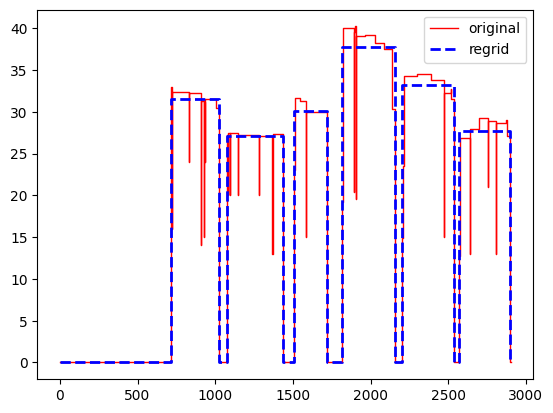

In [17]:
import scale.olm as olm
import matplotlib.pyplot as plt
import json

time0=[0,351,714,715,716.5,718.5,719.5,720.5,830.5,831,907,907.5,930.5,930.7,934.2,934.7,1004.2,1021.8,1021.8,1073,1073.5,1075.5,1077,1078,1079,1081.5,1082,1094,1094.5,1146,1147,1285,1285.2,1368.2,1369.2,1435.2,1435.2,1507,1507.5,1509.5,1511.5,1513.5,1548.5,1586.5,1587.5,1716.7,1716.7,1817,1825,1893.9,1896.4,1900.4,1905.4,1907.4,1967.3,2027.2,2087.1,2137,2157,2157,2205,2211,2213,2214,2300.7,2387.3,2474,2475,2519.8,2520.9,2537.7,2539.3,2539.3,2569.3,2577.1,2637.7,2638.7,2696.3,2753.9,2754.9,2808.6,2809.6,2875,2876,2896.5,2897.5,2897.5,2903.3]
burnup0=[0,0,0,7,30,77,110,126,3685,3697,6143,6150,6869,6872,6981,6993,9184,9719,9719,9719,9722,9748,9778,9804,9831,9899,9909,10239,10249,11665,11685,15448,15452,17699,17712,19515,19515,19515,19519,19547,19593,19650,20756,21945,21960,25834,25834,25834,25988,28747,28798,28956,29157,29196,31537,33886,36179,38051,38658,38658,38658,38747,38794,38819,41793,44779,47713,47728,49175,49211,49740,49762,49762,49762,49861,51491,51504,53110,54796,54817,56367,56380,58257,58286,58842,58854,58854,58854]
bh = olm.core.BurnupHistory(time0, burnup0)

bh.plot_power_history(label='original')

x = bh.classify_operations(min_shutdown_time=10.0)

new_time = bh.get_cycle_time(x)

bh2 = bh.regrid(new_time)
bh2.plot_power_history(label='regrid',add_to_existing=True)

lines = plt.gca().lines
plt.setp(lines[0], linestyle='-', color='red', linewidth=1)
plt.setp(lines[1], linestyle='dashed', color='blue', linewidth=2)
plt.legend()
print("original final burnup and time",bh.burnup[-1], bh.time[-1])
print("new final burnup and time (same)", bh2.burnup[-1], bh2.time[-1] )

In [20]:
time =   [0, 5,  10,  50,  55,  100,  105]
burnup = [0, 0, 100, 500, 500, 1000, 1000]
bh = olm.core.BurnupHistory(time, burnup)

bh.interval_time

bh.interval_power

x = bh.classify_operations()

print(json.dumps(x,indent=4))

{
    "options": {
        "min_shutdown_time": 0.0,
        "min_shutdown_power": 0.0,
        "starts_within_cycle": null
    },
    "operations": [
        {
            "cycle": "",
            "within_cycle": false,
            "start": 0,
            "end": 1
        },
        {
            "cycle": "1",
            "within_cycle": true,
            "start": 1,
            "end": 3
        },
        {
            "cycle": "",
            "within_cycle": false,
            "start": 3,
            "end": 4
        },
        {
            "cycle": "2",
            "within_cycle": true,
            "start": 4,
            "end": 5
        },
        {
            "cycle": "",
            "within_cycle": false,
            "start": 5,
            "end": 6
        }
    ]
}


In [ ]:
print(bh2.interval_time,bh2.interval_power)
plt.step(bh.time,[bh.interval_power[0],*bh.interval_power],where='pre')
plt.step(bh2.time,[bh2.interval_power[0],*bh2.interval_power],where='pre')

In [ ]:
time0=[0,351,714,715,716.5,718.5,719.5,720.5,830.5,831,907,907.5,930.5,930.7,934.2,934.7,1004.2,1021.8,1021.8,1073,1073.5,1075.5,1077,1078,1079,1081.5,1082,1094,1094.5,1146,1147,1285,1285.2,1368.2,1369.2,1435.2,1435.2,1507,1507.5,1509.5,1511.5,1513.5,1548.5,1586.5,1587.5,1716.7,1716.7,1817,1825,1893.9,1896.4,1900.4,1905.4,1907.4,1967.3,2027.2,2087.1,2137,2157,2157,2205,2211,2213,2214,2300.7,2387.3,2474,2475,2519.8,2520.9,2537.7,2539.3,2539.3,2569.3,2577.1,2637.7,2638.7,2696.3,2753.9,2754.9,2808.6,2809.6,2875,2876,2896.5,2897.5,2897.5,2903.3]
burnup0=[0,0,0,7,30,77,110,126,3685,3697,6143,6150,6869,6872,6981,6993,9184,9719,9719,9719,9722,9748,9778,9804,9831,9899,9909,10239,10249,11665,11685,15448,15452,17699,17712,19515,19515,19515,19519,19547,19593,19650,20756,21945,21960,25834,25834,25834,25988,28747,28798,28956,29157,29196,31537,33886,36179,38051,38658,38658,38658,38747,38794,38819,41793,44779,47713,47728,49175,49211,49740,49762,49762,49762,49861,51491,51504,53110,54796,54817,56367,56380,58257,58286,58842,58854,58854,58854]
bh = olm.core.BurnupHistory(time0,burnup0)
c=0
start_decay = 0
all_intervals=[]
tlabel="pre"
for s in bh.identify_cycles():
    c+=1
    all_intervals.append([start_decay,s[0],tlabel])
    #for i in range(s[0],s[1]):
        #print(c,i,bh.interval_time[i], bh.interval_power[i])
    tlabel = "cycle"+str(c)+"-up"
    all_intervals.append([s[0],s[1],tlabel])
    tlabel = "cycle"+str(c)+"-down"
    start_decay=s[1]
all_intervals.append([start_decay,len(bh.interval_time),"post"])
import json
print(json.dumps(all_intervals,indent=4))

In [ ]:
p9_list = np.linspace(68,75,10)

In [ ]:
fp_list=[]
uo2 = {"iso": {"u235": 0.231, "u236": 1e-10, "u234": 1e-10, "u238": 100-0.231}}
am241=1.0
target_p=5.5
for pu239_frac in p9_list:
    x=olm.generate.comp_mox_ornltm2003_2(state={"pu239_frac": pu239_frac, "pu_frac": target_p}, 
                                         density=10.4, 
                                         uo2=uo2, 
                                         am241=am241)
    iso = x['puo2']['iso']
    fp_list.append( iso['pu239']+iso['pu241'])

In [ ]:
plt.plot(p9_list,fp_list)
plt.xlabel('pu239')
plt.ylabel('pu239+pu241')

In [ ]:
conv=np.asarray(p9_list)/np.asarray(fp_list)
plt.plot(fp_list,conv)
plt.xlabel('pu239+pu241')
plt.ylabel('pu239/(pu239+pu241)')

In [ ]:
target_fp=72.64
fp_to_p9 = np.interp([target_fp],fp_list,conv)[0]

In [ ]:
target_p9 = fp_to_p9*target_fp
print("pu239_frac that will lead to target fissile content", target_p9)

In [ ]:
x=olm.generate.comp_mox_ornltm2003_2(state={"pu239_frac": target_p9, "pu_frac": target_p}, 
                                     density=10.4, 
                                     uo2=uo2, 
                                     am241=am241)

In [ ]:
olm.common.get_template_names()
txt = olm.common.load_template('{olm_templates_path}/check/LowOrderConsistency/MOX.inp')
#print(txt)
data={
    "_": {
        "env": {"work_dir": ""}, 
        "model": {"name": "mox_w14x14"}
    },
    "_arpinfo": {
        "interpvars": {
            "mod_dens": 0.75
        } 
    }, 
    "comp": {"system": x }, 
    "history": {
        "initialhm": 1, 
        "burndata": [
            {"power": 40, "burn": 100}
        ]
    }
}
print(olm.common.expand_template(txt,data))

In [ ]:
td = olm.core.TempDir()
scalerte = olm.core.ScaleRte("/Users/Shared/ornldev/code/scale/builds/release/INSTALL/bin/scalerte")

In [ ]:
import scipy as sp
time0=[0,351,714,715,716.5,718.5,719.5,720.5,830.5,831,907,907.5,930.5,930.7,934.2,934.7,1004.2,1021.8,1021.8,1073,1073.5,1075.5,1077,1078,1079,1081.5,1082,1094,1094.5,1146,1147,1285,1285.2,1368.2,1369.2,1435.2,1435.2,1507,1507.5,1509.5,1511.5,1513.5,1548.5,1586.5,1587.5,1716.7,1716.7,1817,1825,1893.9,1896.4,1900.4,1905.4,1907.4,1967.3,2027.2,2087.1,2137,2157,2157,2205,2211,2213,2214,2300.7,2387.3,2474,2475,2519.8,2520.9,2537.7,2539.3,2539.3,2569.3,2577.1,2637.7,2638.7,2696.3,2753.9,2754.9,2808.6,2809.6,2875,2876,2896.5,2897.5,2897.5,2903.3]
burnup0=[0,0,0,7,30,77,110,126,3685,3697,6143,6150,6869,6872,6981,6993,9184,9719,9719,9719,9722,9748,9778,9804,9831,9899,9909,10239,10249,11665,11685,15448,15452,17699,17712,19515,19515,19515,19519,19547,19593,19650,20756,21945,21960,25834,25834,25834,25988,28747,28798,28956,29157,29196,31537,33886,36179,38051,38658,38658,38658,38747,38794,38819,41793,44779,47713,47728,49175,49211,49740,49762,49762,49762,49861,51491,51504,53110,54796,54817,56367,56380,58257,58286,58842,58854,58854,58854]
time=[0]
burnup=[0]
for j in range(1,len(time0)):
    if time0[j]-time0[j-1]>0:
        time.append(time0[j])
        burnup.append(burnup0[j])
plt.plot(bh.time,bh.burnup)
print(bh.intervals)

In [ ]:
import copy
def sebastian(a, b, kind='mergesort'):
    # took mergesort as it seemed a tiny bit faster for my sorted large array try.
    c = np.concatenate((a, b)) # we still need to do this unfortunatly.
    c.sort(kind=kind)
    flag = np.ones(len(c), dtype=bool)
    np.not_equal(c[1:], c[:-1], out=flag[1:])
    return c[flag]
ius = sp.interpolate.InterpolatedUnivariateSpline(time,burnup,k=1)
a, = np.where(np.diff(burnup)==0)
intervals=[]
for x in a:
    intervals.append([x,x+1])
print('j0',intervals)
intervals2 = [ list(intervals[0]) ]
for i in range(1,len(intervals)):
    if intervals2[-1][1]==intervals[i][0]:
        intervals2[-1][1] = intervals[i][1]
    else:
        intervals2.append(list(intervals[i]))
print('i0',intervals)
print('i1',intervals2)

In [ ]:
z, = np.where(np.diff(burnup)>0)
print(z)
power_interval = [[z[0],None]]
for i in range(len(z)):
    power_interval[-1][1] = z[i]
print(power_interval)

In [ ]:
burnup[2:19], burnup[17]-burnup[2]

In [ ]:
interval = [0,1]

In [ ]:
grid = sebastian(time,np.linspace(time[0],time[-1],10000))
dius = ius.derivative()
plt.plot(grid,ius(grid))

In [ ]:
plt.plot(grid,dius(grid))

In [ ]:
power = np.diff(burnup)/np.diff(time)
plt.step(time[1:],power)